In [1]:
%load_ext autoreload
%autoreload 2
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pympc.geometry.polytope import Polytope
from pympc.dynamical_systems import DTAffineSystem, DTPWASystem

In [3]:
m = 1.
g = 10.
k = 1000.
h = .1
q_max = 1000.
v_max = 1000.

In [4]:
# dynamics n.0
A_0 = np.array([[0., 1.],[0., 0.]])
B_0 = np.zeros((2,1))
c_0 = np.array([[0.],[-g]])

# dynamics n.1
A_1 = np.array([[0., 1.],[-k/m, 0.]])
B_1 = B_0
c_1 = c_0

In [5]:
x_max_0 = np.array([[q_max],[v_max]])
x_min_0 = np.array([[0.],[-v_max]])
X_0 = Polytope.from_bounds(x_min_0, x_max_0)
X_0.assemble()

x_max_1 = np.array([[0.],[v_max]])
x_min_1 = - x_max_0
X_1 = Polytope.from_bounds(x_min_1, x_max_1)
X_1.assemble()

X = [X_0, X_1]

U = Polytope.from_bounds(-np.ones((1,1)), np.ones((1,1)))
U.assemble()
U = [U]*2

<IPython.core.display.Javascript object>


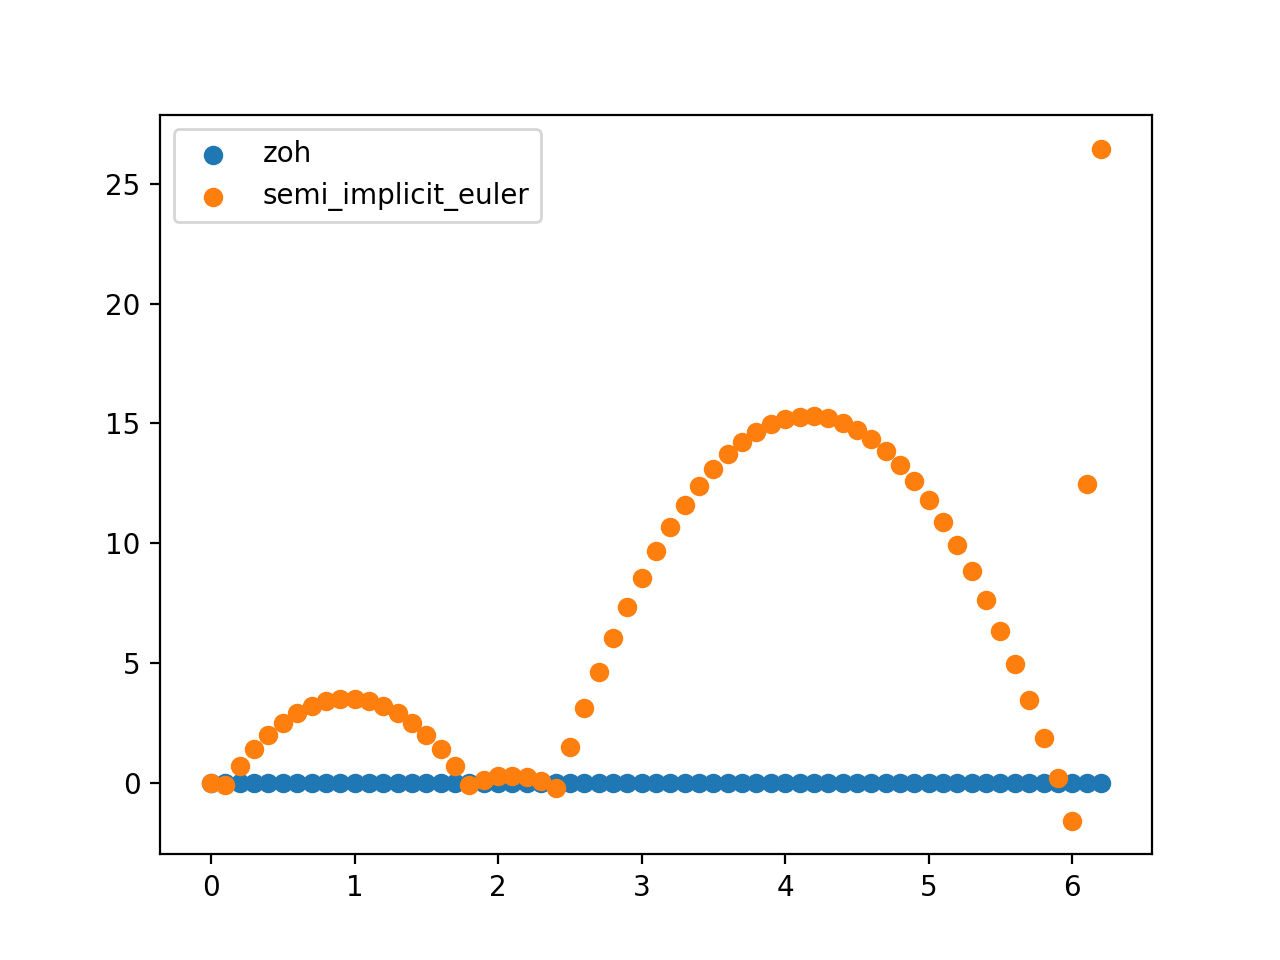

In [30]:
x0 = np.array([[-1.e-5],[0.]])
N = 62
h = .1
time = [t*h for t in range(N+1)]
fig = plt.figure()
method = 'semi_implicit_euler'
#for x0 in [np.array([[1.e-5],[0.]]), np.array([[-1.e-5],[0.]])]:
for method in ['zoh', 'semi_implicit_euler']:#, 'explicit_euler']:
    S_0 = DTAffineSystem.from_continuous(A_0, B_0, c_0, h, method)
    S_1 = DTAffineSystem.from_continuous(A_1, B_1, c_1, h, method)
    S = DTPWASystem.from_orthogonal_domains([S_0, S_1], X, U)
    x_list, _ = S.simulate(x0, [np.zeros((1,1))]*N)
    q_list = [x[0,0] for x in x_list]
    plt.scatter(time, q_list, label=method)
plt.legend()
plt.show()